In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier



from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [110]:
data_accepted = pd.read_csv('accepted_2007_to_2018_100T.csv' )

C:\Users\hannan\anaconda3\envs\mlProject\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [111]:
data_accepted

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term;
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.00,0.0000,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,;
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.00,0.0000,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,Na

In [112]:
data_accepted.isna().mean().sort_values()

id                                            0.000000
num_tl_90g_dpd_24m                            0.009500
application_type                              0.009500
policy_code                                   0.009500
num_tl_op_past_12m                            0.009500
collections_12_mths_ex_med                    0.009500
last_fico_range_low                           0.009500
last_fico_range_high                          0.009500
num_tl_30dpd                                  0.009500
pct_tl_nvr_dlq                                0.009500
pub_rec_bankruptcies                          0.009500
collection_recovery_fee                       0.009500
recoveries                                    0.009500
total_rec_late_fee                            0.009500
total_rec_int                                 0.009500
total_rec_prncp                               0.009500
total_pymnt_inv                               0.009500
last_pymnt_amnt                               0.009500
avg_cur_ba

In [113]:
#Dropping columns with more than 29 % missing values }
data_accepted = data_accepted.drop(data_accepted.loc[:, data_accepted.isna().mean().sort_values() > 0.29].columns, axis=1)


In [114]:
data_accepted

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,settlement_term;
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.00,0.0000,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,;
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.00,0.0000,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,;
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.00,0.0000,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,Joint App,0.0,0.0,189699.0,14000.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,;
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.00,0.0000,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,Individual,0.0,0.0,301500.0,67300.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N,;
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendin

In [115]:
data_accepted = data_accepted.dropna(axis=0).reset_index(drop=True)

In [116]:
data_accepted.isna().sum().sum()

0

In [117]:
data_accepted

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,settlement_term;
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.00,0.0000,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,;
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.00,0.0000,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,;
2,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.00,0.0000,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,;
3,68476668,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,B2,Vice President of Recruiting Operations,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Debt consolidation,550xx,MN,14.67,0.0,Jun-1990,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,f,0.0,0.0,21393.800000,21393.80,20000.00,1393.80,0.0,0.00,0.0000,Nov-2016,15681.05,Mar-2019,654.0,650.0,0.0,1.0,Individual,0.0,0.0,360358.0,94200.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash,N,;
4,67275481,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,B1,road driver,10+ years,MORTGAGE,85000.0,Not Verified,Dec-2015,Fully Paid,n,https

In [118]:
extra = ['id', 'sub_grade', 'emp_title', 'url', 'title', 'zip_code','settlement_term;']

In [119]:
{column: list(data_accepted[column].unique()) for column in data_accepted.drop(extra, axis=1).columns if data_accepted.dtypes[column] == 'object'}

{'term': [' 36 months', ' 60 months'],
 'grade': ['C', 'F', 'B', 'A', 'E', 'D', 'G'],
 'emp_length': ['10+ years',
  '3 years',
  '6 years',
  '1 year',
  '7 years',
  '8 years',
  '5 years',
  '2 years',
  '9 years',
  '< 1 year',
  '4 years'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'ANY'],
 'verification_status': ['Not Verified', 'Source Verified', 'Verified'],
 'issue_d': ['Dec-2015', 'Nov-2015', 'Oct-2015'],
 'loan_status': ['Fully Paid',
  'Current',
  'Charged Off',
  'In Grace Period',
  'Late (31-120 days)',
  'Late (16-30 days)'],
 'pymnt_plan': ['n', 'y'],
 'purpose': ['debt_consolidation',
  'small_business',
  'major_purchase',
  'credit_card',
  'home_improvement',
  'house',
  'other',
  'car',
  'medical',
  'vacation',
  'moving',
  'renewable_energy'],
 'addr_state': ['PA',
  'SD',
  'MN',
  'SC',
  'RI',
  'TX',
  'CA',
  'VA',
  'AZ',
  'NY',
  'MD',
  'KS',
  'NM',
  'WA',
  'MO',
  'OH',
  'GA',
  'IL',
  'FL',
  'CO',
  'IN',
  'MI',
  'LA',
  'DC',
  'MA'

In [120]:
data_accepted = data_accepted.drop(extra, axis=1)

In [121]:
month_year = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d']



In [122]:
data_accepted['issue_d']

0        Dec-2015
1        Dec-2015
2        Dec-2015
3        Dec-2015
4        Dec-2015
           ...   
75586    Oct-2015
75587    Oct-2015
75588    Oct-2015
75589    Oct-2015
75590    Oct-2015
Name: issue_d, Length: 75591, dtype: object

In [123]:
for column in month_year:
    data_accepted[column + '_month'] = data_accepted[column].apply(lambda x: x[0:3])
    data_accepted[column + '_year'] = data_accepted[column].apply(lambda x: x[-4:])

In [124]:
data_accepted

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.00,0.0000,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,Dec,2015,Aug,2003,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,small_business,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.00,0.0000,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,Dec,2015,Dec,1999,Jun,2016,Mar,2019
2,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.00,0.0000,Jul-2016,10128.96,Mar-2018,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,Dec,2015,Jun,1998,Jul,2016,Mar,2018
3,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,10+ years,MORTGAGE,180000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,MN,14.67,0.0,Jun-1990,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,f,0.0,0.0,21393.800000,21393.80,20000.00,1393.80,0.0,0.00,0.0000,Nov-2016,15681.05,Mar-2019,654.0,650.0,0.0,1.0,Individual,0.0,0.0,360358.0,94200.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash,N,Dec,2015,Jun,1990,Nov,2016,Mar,2019
4,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,10+ years,MORTGAGE,85000.0,Not Verified,Dec-2015,Fully Paid,n,major_purchase,SC,17.61,1.0,Feb-1999,705.0,709.0,0.0,8.0,0.0,826.0,5.7,15.0,w,0.0,0.0,21538.508977,21538.51,20000.00,1538.51,0.0,0.00,0.0000,Jan-2017,14618.23,Mar-2019,674.0,670.0,0.0,1.0,Individual,0.0,0.

In [125]:
data_accepted = data_accepted.drop(month_year, axis=1)

In [126]:
data_accepted

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.00,0.0000,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,Dec,2015,Aug,2003,Jan,2019,Mar,2019
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.00,0.0000,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,Dec,2015,Dec,1999,Jun,2016,Mar,2019
2,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,n,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.00,0.0000,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,Dec,2015,Jun,1998,Jul,2016,Mar,2018
3,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,10+ years,MORTGAGE,180000.0,Not Verified,Fully Paid,n,debt_consolidation,MN,14.67,0.0,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,f,0.0,0.0,21393.800000,21393.80,20000.00,1393.80,0.0,0.00,0.0000,15681.05,654.0,650.0,0.0,1.0,Individual,0.0,0.0,360358.0,94200.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash,N,Dec,2015,Jun,1990,Nov,2016,Mar,2019
4,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,10+ years,MORTGAGE,85000.0,Not Verified,Fully Paid,n,major_purchase,SC,17.61,1.0,705.0,709.0,0.0,8.0,0.0,826.0,5.7,15.0,w,0.0,0.0,21538.508977,21538.51,20000.00,1538.51,0.0,0.00,0.0000,14618.23,674.0,670.0,0.0,1.0,Individual,0.0,0.0,141601.0,14500.0,4.0,17700.0,13674.0,5.7,0.0,0.0,149.0,55.0,32.0,13.0,3.0,32.0,8.0,1.0,2.0,2.0,3.0,3.0,9.0,3.0,3.0,2.0,8.0,0.0,0.0,1.0,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0,N,Cash,N,Dec,2015,Feb,1999,Jan,2017,Mar,2019
.

In [127]:
month_ordering = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [128]:
for column in month_year:
    data_accepted[column + '_month'] = data_accepted[column + '_month'].apply(lambda x: month_ordering.index(x))

In [129]:
data_accepted

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.00,0.0000,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,11,2015,7,2003,0,2019,2,2019
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.00,0.0000,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,11,2015,11,1999,5,2016,2,2019
2,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,n,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.00,0.0000,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N,11,2015,5,1998,6,2016,2,2018
3,20000.0,20000.0,20000.0,36 months,9.17,637.58,B,10+ years,MORTGAGE,180000.0,Not Verified,Fully Paid,n,debt_consolidation,MN,14.67,0.0,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,f,0.0,0.0,21393.800000,21393.80,20000.00,1393.80,0.0,0.00,0.0000,15681.05,654.0,650.0,0.0,1.0,Individual,0.0,0.0,360358.0,94200.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,N,Cash,N,11,2015,5,1990,10,2016,2,2019
4,20000.0,20000.0,20000.0,36 months,8.49,631.26,B,10+ years,MORTGAGE,85000.0,Not Verified,Fully Paid,n,major_purchase,SC,17.61,1.0,705.0,709.0,0.0,8.0,0.0,826.0,5.7,15.0,w,0.0,0.0,21538.508977,21538.51,20000.00,1538.51,0.0,0.00,0.0000,14618.23,674.0,670.0,0.0,1.0,Individual,0.0,0.0,141601.0,14500.0,4.0,17700.0,13674.0,5.7,0.0,0.0,149.0,55.0,32.0,13.0,3.0,32.0,8.0,1.0,2.0,2.0,3.0,3.0,9.0,3.0,3.0,2.0,8.0,0.0,0.0,1.0,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0,N,Cash,N,11,2015,1,1999,0,2017,2,2019
...,...,...,...,...,...,...,...,..

In [130]:
for column in data_accepted.columns:
    try:
        data_accepted[column] = data_accepted[column].astype(np.float)
    except:
        pass

In [131]:
data_accepted['grade'].value_counts()

B    22718
C    22654
A    12449
D    10351
E     5591
F     1504
G      324
Name: grade, dtype: int64

In [132]:
#getting one hot columns for nomimal featues .

pd.get_dummies(data_accepted['home_ownership'])

,ANY,MORTGAGE,OWN,RENT
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
75586,0,0,0,1
75587,0,0,0,1
75588,0,1,0,0
75589,0,0,0,1


In [133]:

def one_column(data, columns):

    data = data.copy()
    for column in columns:
        dummies = pd.get_dummies(data[column], prefix=column)
        data = pd.concat([data, dummies], axis=1)
        data = data.drop(column, axis=1)
    return data


In [134]:

    
    # One-hot encode for colums 
one_column(data_accepted,columns=['home_ownership', 'verification_status', 'purpose', 'addr_state'])


    
    


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,annual_inc,loan_status,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,10+ years,55000.0,Fully Paid,n,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.00,0.0000,122.67,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,11.0,2015.0,7.0,2003.0,0.0,2019.0,2.0,2019.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,10+ years,65000.0,Fully Paid,n,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.00,0.0000,926.35,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,11.0,2015.0,11.0,1999.0,5.0,2016.0,2.0,2019.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,3 years,104433.0,Fully Paid,n,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,w,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.00,0.0000,10128.96,704.0,700.0,0.0,1.0,Individual,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1

In [135]:

binary_features = ['term', 'pymnt_plan', 'initial_list_status', 'application_type', 'hardship_flag', 'disbursement_method', 'debt_settlement_flag']
binary_positives = [' 60 months', 'y', 'w', 'Individual', 'Y', 'Cash', 'Y']

In [136]:
def dual_encode(data, column, positive_value):
    data[column] = data[column].apply(lambda x: 1 if x == positive_value else 0)
    
    


In [137]:

dual_encode(data_accepted, 'term', ' 60 months')
dual_encode(data_accepted, 'pymnt_plan', 'y')
dual_encode(data_accepted, 'initial_list_status', 'w')
dual_encode(data_accepted, 'application_type', 'Individual')
dual_encode(data_accepted, 'hardship_flag', 'Y')
dual_encode(data_accepted, 'disbursement_method', 'Cash')
dual_encode(data_accepted, 'debt_settlement_flag', 'Y')


In [138]:
data_accepted


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,0,13.99,123.03,C,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,0,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.00,0.0000,122.67,564.0,560.0,0.0,1.0,1,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,1,0,11.0,2015.0,7.0,2003.0,0.0,2019.0,2.0,2019.0
1,24700.0,24700.0,24700.0,0,11.99,820.28,C,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,0,small_business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.00,0.0000,926.35,699.0,695.0,0.0,1.0,1,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,1,0,11.0,2015.0,11.0,1999.0,5.0,2016.0,2.0,2019.0
2,10400.0,10400.0,10400.0,1,22.45,289.91,F,3 years,MORTGAGE,104433.0,Source Verified,Fully Paid,0,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,1,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.00,0.0000,10128.96,704.0,700.0,0.0,1.0,1,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,0,1,0,11.0,2015.0,5.0,1998.0,6.0,2016.0,2.0,2018.0
3,20000.0,20000.0,20000.0,0,9.17,637.58,B,10+ years,MORTGAGE,180000.0,Not Verified,Fully Paid,0,debt_consolidation,MN,14.67,0.0,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,0,0.0,0.0,21393.800000,21393.80,20000.00,1393.80,0.0,0.00,0.0000,15681.05,654.0,650.0,0.0,1.0,1,0.0,0.0,360358.0,94200.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,0,1,0,11.0,2015.0,5.0,1990.0,10.0,2016.0,2.0,2019.0
4,20000.0,20000.0,20000.0,0,8.49,631.26,B,10+ years,MORTGAGE,85000.0,Not Verified,Fully Paid,0,major_purchase,SC,17.61,1.0,705.0,709.0,0.0,8.0,0.0,826.0,5.7,15.0,1,0.0,0.0,21538.508977,21538.51,20000.00,1538.51,0.0,0.00,0.0000,14618.23,674.0,670.0,0.0,1.0,1,0.0,0.0,141601.0,14500.0,4.0,17700.0,13674.0,5.7,0.0,0.0,149.0,55.0,32.0,13.0,3.0,32.0,8.0,1.0,2.0,2.0,3.0,3.0,9.0,3.0,3.0,2.0,8.0,0.0,0.0,1.0,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0,0,1,0,11.0,2015.0,1.0,1999.0,0.0,2017.0,2.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [139]:
ordinal_features = ['emp_length', 'grade']
emp_ordering = [
    '< 1 year',
    '1 year',
    '2 years',
    '3 years',
    '4 years',
    '5 years',
    '6 years',
    '7 years',
    '8 years',
    '9 years',
    '10+ years'
]

grade_ordering = [
    'A',
    'B',
    'C',
    'D',
    'E',
    'F',
    'G'
]


In [140]:
def ordering(data):
    data['emp_length'] = data['emp_length'].apply(lambda x: emp_ordering.index(x))
    data['grade'] = data['grade'].apply(lambda x: grade_ordering.index(x))


In [141]:
ordering(data_accepted)

In [142]:
data_accepted

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
0,3600.0,3600.0,3600.0,0,13.99,123.03,2,10,MORTGAGE,55000.0,Not Verified,Fully Paid,0,debt_consolidation,PA,5.91,0.0,675.0,679.0,1.0,7.0,0.0,2765.0,29.7,13.0,1,0.0,0.0,4421.723917,4421.72,3600.00,821.72,0.0,0.00,0.0000,122.67,564.0,560.0,0.0,1.0,1,0.0,722.0,144904.0,9300.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,0,1,0,11.0,2015.0,7.0,2003.0,0.0,2019.0,2.0,2019.0
1,24700.0,24700.0,24700.0,0,11.99,820.28,2,10,MORTGAGE,65000.0,Not Verified,Fully Paid,0,small_business,SD,16.06,1.0,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,1,0.0,0.0,25679.660000,25679.66,24700.00,979.66,0.0,0.00,0.0000,926.35,699.0,695.0,0.0,1.0,1,0.0,0.0,204396.0,111800.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,0,1,0,11.0,2015.0,11.0,1999.0,5.0,2016.0,2.0,2019.0
2,10400.0,10400.0,10400.0,1,22.45,289.91,5,3,MORTGAGE,104433.0,Source Verified,Fully Paid,0,major_purchase,PA,25.37,1.0,695.0,699.0,3.0,12.0,0.0,21929.0,64.5,35.0,1,0.0,0.0,11740.500000,11740.50,10400.00,1340.50,0.0,0.00,0.0000,10128.96,704.0,700.0,0.0,1.0,1,0.0,0.0,331730.0,34000.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,0,1,0,11.0,2015.0,5.0,1998.0,6.0,2016.0,2.0,2018.0
3,20000.0,20000.0,20000.0,0,9.17,637.58,1,10,MORTGAGE,180000.0,Not Verified,Fully Paid,0,debt_consolidation,MN,14.67,0.0,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,0,0.0,0.0,21393.800000,21393.80,20000.00,1393.80,0.0,0.00,0.0000,15681.05,654.0,650.0,0.0,1.0,1,0.0,0.0,360358.0,94200.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0,0,1,0,11.0,2015.0,5.0,1990.0,10.0,2016.0,2.0,2019.0
4,20000.0,20000.0,20000.0,0,8.49,631.26,1,10,MORTGAGE,85000.0,Not Verified,Fully Paid,0,major_purchase,SC,17.61,1.0,705.0,709.0,0.0,8.0,0.0,826.0,5.7,15.0,1,0.0,0.0,21538.508977,21538.51,20000.00,1538.51,0.0,0.00,0.0000,14618.23,674.0,670.0,0.0,1.0,1,0.0,0.0,141601.0,14500.0,4.0,17700.0,13674.0,5.7,0.0,0.0,149.0,55.0,32.0,13.0,3.0,32.0,8.0,1.0,2.0,2.0,3.0,3.0,9.0,3.0,3.0,2.0,8.0,0.0,0.0,1.0,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0,0,1,0,11.0,2015.0,1.0,1999.0,0.0,2017.0,2.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [143]:
# Encoding label column

target_encoding = LabelEncoder()

data_accepted['loan_status'] = target_encoding.fit_transform(data_accepted['loan_status'])

outcome = {index: label for index, label in enumerate(target_encoding.classes_)}
outcome

{0: 'Charged Off',
 1: 'Current',
 2: 'Fully Paid',
 3: 'In Grace Period',
 4: 'Late (16-30 days)',
 5: 'Late (31-120 days)'}

In [149]:
def inputs(data):
    data = data.copy()

#one hot encoding
    data = one_column(
        data,
        columns=['home_ownership', 'verification_status', 'purpose', 'addr_state']
    )
   
    # Split df into X and y
    y = data['loan_status'].copy()
    X = data.drop('loan_status', axis=1).copy()
    
    scaler = StandardScaler()

    X = scaler.fit_transform(X)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
    
    return X_train, X_test, y_train, y_test


In [150]:
data_accepted['loan_status'].unique()

array([2, 1, 0, 3, 5, 4])

In [151]:
X_train, X_test, y_train, y_test = inputs(data_accepted)

In [152]:
X_train

array([[ 0.54832246,  0.54832246,  0.54969905, ..., -0.11793804,
        -0.05783495, -0.04322947],
       [ 1.43121034,  1.43121034,  1.43310797, ..., -0.11793804,
        -0.05783495, -0.04322947],
       [-0.03252483, -0.03252483, -0.03149103, ..., -0.11793804,
        -0.05783495, -0.04322947],
       ...,
       [-0.03252483, -0.03252483, -0.03149103, ..., -0.11793804,
        -0.05783495, -0.04322947],
       [-0.61337212, -0.61337212, -0.61268111, ..., -0.11793804,
        -0.05783495, -0.04322947],
       [-0.90379576, -0.90379576, -0.90327615, ..., -0.11793804,
        -0.05783495, -0.04322947]])

In [153]:
y_train

57165    2
69844    2
33695    2
13586    2
51577    2
        ..
37194    0
6265     2
54886    2
860      2
15795    2
Name: loan_status, Length: 52913, dtype: int32

In [154]:
y_test

33934    2
46081    2
33702    2
8441     2
25393    2
        ..
37835    2
68520    2
7528     0
61292    1
33915    0
Name: loan_status, Length: 22678, dtype: int32

In [155]:
target_mappings

{0: 'Charged Off',
 1: 'Current',
 2: 'Fully Paid',
 3: 'In Grace Period',
 4: 'Late (16-30 days)',
 5: 'Late (31-120 days)'}

In [156]:
models = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

   K-Nearest Neighbors trained.


C:\Users\hannan\anaconda3\envs\mlProject\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


   Logistic Regression trained.
Support Vector Machine trained.
         Decision Tree trained.
        Neural Network trained.


In [157]:
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(X_test, y_test) * 100))

   K-Nearest Neighbors Accuracy: 89.51%
   Logistic Regression Accuracy: 99.07%
Support Vector Machine Accuracy: 97.82%
         Decision Tree Accuracy: 98.28%
        Neural Network Accuracy: 98.69%


In [158]:
inputs = tf.keras.Input(shape=(154,))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(6, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


batch_size = 128
epochs = 20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Epoch 1/20
331/331 [==============================] - 2s 3ms/step - loss: 0.3209 - accuracy: 0.9011 - val_loss: 0.0841 - val_accuracy: 0.9751
Epoch 2/20
331/331 [==============================] - 1s 2ms/step - loss: 0.0561 - accuracy: 0.9849 - val_loss: 0.0683 - val_accuracy: 0.9817
Epoch 3/20
331/331 [==============================] - 1s 2ms/step - loss: 0.0405 - accuracy: 0.9883 - val_loss: 0.0670 - val_accuracy: 0.9819
Epoch 4/20
331/331 [==============================] - 1s 2ms/step - loss: 0.0338 - accuracy: 0.9903 - val_loss: 0.0744 - val_accuracy: 0.9809
Epoch 5/20
331/331 [==============================] - 1s 2ms/step - loss: 0.0304 - accuracy: 0.9908 - val_loss: 0.0761 - val_accuracy: 0.9821
Epoch 6/20
331/331 [==============================] - 1s 2ms/step - loss: 0.0236 - accuracy: 0.9926 - val_loss: 0.0695 - val_accuracy: 0.9845
Epoch 7/20
331/331 [==============================] - 1s 2ms/step - loss: 0.0177 - accuracy: 0.9949 - val_loss: 0.0809 - val_accuracy: 0.9831
Epoch 

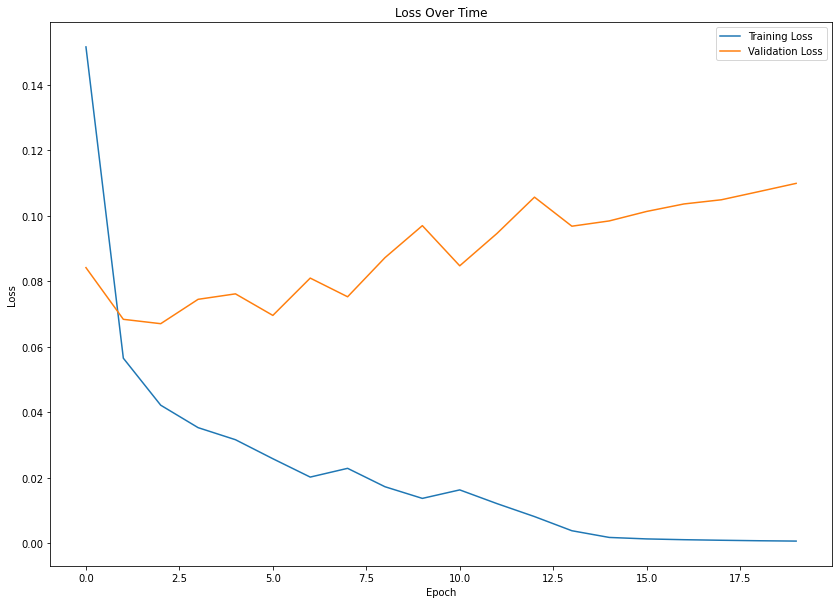

In [159]:
plt.figure(figsize=(14, 10))

epochs_range = range(epochs)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Over Time")
plt.legend()

plt.show()

In [160]:
model.evaluate(X_test, y_test)

709/709 [==============================] - 1s 877us/step - loss: 0.1040 - accuracy: 0.9870


[0.10395731031894684, 0.987035870552063]

In [161]:
predicted_vals = tf.argmax(model(X_test[0:128]), -1)
sum = 0
for i in range(128):
    #print(i)
    print(y_test.values[i], " > ", predicted_vals.numpy()[i])
    if(y_test.values[i] != predicted_vals[i].numpy()):
        sum += 1;
#print(y_test[0], " > ", predicted_vals[0].numpy())
print(sum)

2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
1  >  1
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
1  >  1
2  >  2
2  >  2
0  >  0
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
3  >  1
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
1  >  1
2  >  2
0  >  0
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
0  >  0
0  >  0
2  >  2
1  >  1
1  >  1
2  >  2
0  >  0
2  >  2
1  >  1
2  >  2
2  >  2
1  >  1
2  >  2
2  >  2
2  >  2
1  >  1
2  >  2
3  >  1
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
0  >  0
1  >  1
2  >  2
2  >  2
2  >  2
1  >  1
0  >  0
2  >  2
0  >  0
1  >  1
2  >  2
2  >  2
2  >  2
2  >  2
0  >  0
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2
2  >  2


In [98]:
predicted_vals.numpy()[1]
y_test.values[1]

0

In [ ]:
##https://www.youtube.com/watch?v=TncDz92WLiY&t=1241s